In [1]:
import numpy as np
import pandas as pd
import os

# 1번 DataFrame

In [2]:
train_df_1 = pd.read_csv('./감정분석/ratings_train.txt',header = 0, delimiter = '\t', quoting=3)
train_df_1

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [3]:
# 1번 학습데이터 긍정 1, 부정 0 갯수 확인
print('긍정 수: {}'.format(train_df_1['label'].value_counts()[1]))
print('부정 수: {}'.format(train_df_1['label'].value_counts()[0]))

긍정 수: 74827
부정 수: 75173


In [4]:
train_df_1['label'].value_counts()[1]

74827

In [5]:
# 부정만 따로 뽑기
train_df_1_0 = train_df_1[train_df_1['label'] == 0]
train_df_1_0

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
...,...,...,...
149990,6373651,이걸 영화라고 찎었냐?,0
149992,9335962,공포나 재난영화가 아니라 아예 대놓고 비급 크리쳐개그물임ㅋㅋ 음악 완전 흥겹다ㅋ 5...,0
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0


In [6]:
# 긍정만 따로 뽑기
train_df_1_1 = train_df_1[train_df_1['label'] == 1]
train_df_1_1

,id,document,label
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1
10,9008700,걍인피니트가짱이다.진짜짱이다♥,1
...,...,...,...
149991,9492905,http://blog.naver.com/oroblast/220215679580 나쁜...,1
149993,10020916,For Carl.칼 세이건으로 시작해서 칼 세이건으로 끝난다.,1
149994,9458520,디케이드 다음에 더블 다음에 오즈인데 더블은 조금밖에 안나오네요.,1
149996,8549745,평점이 너무 낮아서...,1


In [7]:
# 긍정 문장에서 랜덤으로 14,000개 추출
train_df_1 = train_df_1_1.sample(n = 14000)
train_df_1

,id,document,label
1972,8184122,두말할 필요 없습니다 인생최고의 애니메이션 영화였습니다 하루히 영원해라!!!!,1
45889,10044932,끝나고 먹먹해져보긴 처음이다...성당에서 그녀를 바라보는 남자의 눈빛을 잊을수가없다,1
76272,9283219,볼거리가 풍부한 영화. 심지어 메시지도 담겨 있다.,1
143529,8588867,"라 당스 La Danse: The Paris Opera Ballet , La Dan...",1
90284,3620630,ㅅ.ㅂ 슈퍼액션 채널에서 네이버 평점 9.1이라고 당당히 띄여놓고 방영하던데 개세네,1
...,...,...,...
116504,9317919,말해 뭐해 명품 명작 명화,1
110559,6450596,ㅠㅠㅠㅠ이게진짜드라마지,1
93505,9201973,재밌고 좋았다 아쉬운건 총격전이 너무 정신없었다는거,1
106430,1952401,재밌어,1



-------------------------------------------------------------------------------

# 2번 Train DataFrame

In [8]:
train_df_2 = pd.read_excel('./감정분석/감성대화말뭉치(최종데이터)_Training - 복사본.xlsx')

In [9]:
train_df_2

,id,document,label
0,44164,아내가 드디어 출산하게 되어서 정말 신이 나.,1
1,31303,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,1
2,47200,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,1
3,1679,남편이 죽기 전에 손자들 얼굴 보고 싶다고 했는데 다행히 늦지 않아서 안도했어.,1
4,41925,친구가 사준 로또가 당첨이 됐어.,1
...,...,...,...
41245,36344,친구들이랑 제주도로 여행 가려고 하는데 비 온다고 들어서 걱정이야.,1
41246,36344,응. 많은 시간을 절약할 수 있어서 기뻐.,1
41247,36344,결과가 좋게 나와서 다행이야,1
41248,36344,덕분에 건강도 챙길 수 있고 너무 좋아. 안마기도 있던데 내일은 운동하고 안마기도 ...,1


In [10]:
# 2번 학습데이터 긍정 1, 부정 0 갯수 확인
print('긍정 수: {}'.format(train_df_2['label'].value_counts()[1]))
print('부정 수: {}'.format(train_df_2['label'].value_counts()[0]))

긍정 수: 13462
부정 수: 27788



-------------------------------------------------------------------------------

# 학습데이터 병합

In [11]:
train_data = pd.concat([train_df_1, train_df_2])

In [12]:
train_data.head()

,id,document,label
1972,8184122,두말할 필요 없습니다 인생최고의 애니메이션 영화였습니다 하루히 영원해라!!!!,1
45889,10044932,끝나고 먹먹해져보긴 처음이다...성당에서 그녀를 바라보는 남자의 눈빛을 잊을수가없다,1
76272,9283219,볼거리가 풍부한 영화. 심지어 메시지도 담겨 있다.,1
143529,8588867,"라 당스 La Danse: The Paris Opera Ballet , La Dan...",1
90284,3620630,ㅅ.ㅂ 슈퍼액션 채널에서 네이버 평점 9.1이라고 당당히 띄여놓고 방영하던데 개세네,1


In [13]:
train_data.reset_index(drop=True, inplace=True)

In [14]:
train_data

,id,document,label
0,8184122,두말할 필요 없습니다 인생최고의 애니메이션 영화였습니다 하루히 영원해라!!!!,1
1,10044932,끝나고 먹먹해져보긴 처음이다...성당에서 그녀를 바라보는 남자의 눈빛을 잊을수가없다,1
2,9283219,볼거리가 풍부한 영화. 심지어 메시지도 담겨 있다.,1
3,8588867,"라 당스 La Danse: The Paris Opera Ballet , La Dan...",1
4,3620630,ㅅ.ㅂ 슈퍼액션 채널에서 네이버 평점 9.1이라고 당당히 띄여놓고 방영하던데 개세네,1
...,...,...,...
55245,36344,친구들이랑 제주도로 여행 가려고 하는데 비 온다고 들어서 걱정이야.,1
55246,36344,응. 많은 시간을 절약할 수 있어서 기뻐.,1
55247,36344,결과가 좋게 나와서 다행이야,1
55248,36344,덕분에 건강도 챙길 수 있고 너무 좋아. 안마기도 있던데 내일은 운동하고 안마기도 ...,1


In [15]:
# 병합 학습데이터 긍정 1, 부정 0 갯수 확인
print('긍정 수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 수: {}'.format(train_data['label'].value_counts()[0]))

긍정 수: 27462
부정 수: 27788


In [17]:
train_data.to_csv('./감정분석/감성대화말뭉치.csv')

In [19]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [20]:
DATA_PATH = './감정분석/' # 데이터 경로 설정

train_data = pd.read_csv('./감정분석/감성대화말뭉치.csv')

In [22]:
train_data.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
train_data

,id,document,label
0,8184122,두말할 필요 없습니다 인생최고의 애니메이션 영화였습니다 하루히 영원해라!!!!,1
1,10044932,끝나고 먹먹해져보긴 처음이다...성당에서 그녀를 바라보는 남자의 눈빛을 잊을수가없다,1
2,9283219,볼거리가 풍부한 영화. 심지어 메시지도 담겨 있다.,1
3,8588867,"라 당스 La Danse: The Paris Opera Ballet , La Dan...",1
4,3620630,ㅅ.ㅂ 슈퍼액션 채널에서 네이버 평점 9.1이라고 당당히 띄여놓고 방영하던데 개세네,1
...,...,...,...
55245,36344,친구들이랑 제주도로 여행 가려고 하는데 비 온다고 들어서 걱정이야.,1
55246,36344,응. 많은 시간을 절약할 수 있어서 기뻐.,1
55247,36344,결과가 좋게 나와서 다행이야,1
55248,36344,덕분에 건강도 챙길 수 있고 너무 좋아. 안마기도 있던데 내일은 운동하고 안마기도 ...,1


train_data.drop(['Unnamed: 0'], axis=1, inplace=True)

train_data

In [24]:
#전처리 함수

def preprocessing(comment, okt, remove_stopwords = False, stop_words =[]):
    # comment - 전처리할 텍스트
    # okt - okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
    # remove_stopword - 불용어를 제거할지 여부 선택. 기본값 False
    # stop_words - 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

    # 한글 및 공백 제외한 문자 모두 제거
    comment_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',comment)

    # okt 객체를 활용하여 형태소 단어로 나눔
    word_review = okt.morphs(comment_text,stem=True)

    if remove_stopwords:
    # 불용어 제거
        word_review = [token for token in word_review if not token in stop_words]
    return word_review

In [25]:
from tqdm import tqdm

In [26]:
# 전체 텍스트 전처리
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt = Okt()
clean_train_comment = []

for comment in tqdm(train_data['document']):
    
    # 댓글이 문자열인 경우만 전처리 진행
    if type(comment) == str:
        clean_train_comment.append(preprocessing(comment,okt,remove_stopwords=True, stop_words= stop_words))
    else:
        clean_train_comment.append([]) #str이 아닌 행은 빈칸으로 놔두기

100%|███████████████████████████████████████████████████████████████████████████| 55250/55250 [01:50<00:00, 499.09it/s]


In [27]:
clean_train_comment[:4]

[['두', '말', '하다', '필요', '없다', '인생', '최고', '애니메이션', '영화', '이다', '하루히', '영원하다'],
 ['끝나다',
  '먹다',
  '먹다',
  '지다',
  '보다',
  '처음',
  '이다',
  '성당',
  '에서',
  '그녀',
  '를',
  '바라보다',
  '남자',
  '눈빛',
  '을',
  '잊다',
  '없다'],
 ['볼거리', '풍부하다', '영화', '심지어', '메시지', '도', '담기다', '있다'],
 ['라', '당스']]

In [28]:
test_data = pd.read_csv(DATA_PATH + 'ratings_test.txt', header = 0, delimiter='\t', quoting=3)

clean_test_comment = []
for comment in tqdm(test_data['document']):
    if type(comment) == str:
        clean_test_comment.append(preprocessing(comment, okt, remove_stopwords=True, stop_words=stop_words))
    else:
        clean_test_comment.append([])

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [02:21<00:00, 354.15it/s]


In [29]:
clean_test_comment[:4]

[['굳다', 'ㅋ'],
 [],
 ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는']]

In [30]:
# 학습데이터로 단어 사전을 생성
# 데이터를 인덱스로 바꿈
# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_comment)
train_sequences = tokenizer.texts_to_sequences(clean_train_comment)
test_sequences = tokenizer.texts_to_sequences(clean_test_comment)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 8 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(train_data['label'])

#평가 데이터 
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(test_data['label'])

In [43]:
len(train_labels)

55250

In [31]:
DEFAULT_PATH  = './감정분석데이터/' # 경로지정
DATA_PATH = 'numpy파일/' #.npy파일 저장 경로지정
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

In [32]:
# 전처리한 데이터들 파일로저장
# 만약 폴더가 없으면 만듬
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
    os.makedirs(DEFAULT_PATH+DATA_PATH)

In [33]:
data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
    os.makedirs(DEFAULT_PATH+DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
json.dump(data_configs,open(DEFAULT_PATH + DATA_PATH + DATA_CONFIGS,'w', encoding='utf-8'),ensure_ascii=False)

In [34]:
# 학습 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
import json

In [35]:
#전처리 데이터 불러오기
DATA_PATH = './감정분석데이터/numpy파일/'
DATA_OUT = './감정분석데이터/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'))
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'))
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r', encoding='utf-8'))

In [36]:
model_name= 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

kargs={'model_name': model_name, 
       'vocab_size':prepro_configs['vocab_size'],
       'embbeding_size':128, 
       'num_filters':100,
       'dropout_rate':0.5, 
       'hidden_dimension':250,
       'output_dimension':1}

In [37]:
class CNNClassifier(tf.keras.Model):

    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, 
                                        padding='valid',activation = tf.keras.activations.relu,
                                        kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                                activation = tf.keras.activations.relu,
                                kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                                activation=tf.keras.activations.sigmoid,
                                kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))


    def call(self,x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [38]:
from tensorflow.keras.models import save_model

In [39]:
# 에포크는 10으로 주어 학습을 진행
# 검증 정확도가 그전보다 낮아지면 학습을 멈춤


model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

#검증 정확도를 통한 EarlyStopping 기능 및 모델 저장 방식 지정
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
checkpoint_path = DATA_OUT + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor = 'val_accuracy', verbose=1, save_best_only = True,
    save_weights_only=True
)

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])
# 모델 저장하기
save_model(model,'./감정분석데이터/Model/')

./감정분석데이터/DATA_OUT -- Folder already exists 

Epoch 1/10
98/98 [==============================] - ETA: 0s - loss: 0.3668 - accuracy: 0.8217
Epoch 00001: val_accuracy improved from -inf to 0.67186, saving model to ./감정분석데이터/DATA_OUT\weights.h5
98/98 [==============================] - 4s 41ms/step - loss: 0.3668 - accuracy: 0.8217 - val_loss: 0.6838 - val_accuracy: 0.6719
Epoch 2/10
97/98 [============================>.] - ETA: 0s - loss: 0.1864 - accuracy: 0.9275
Epoch 00002: val_accuracy did not improve from 0.67186
98/98 [==============================] - 4s 37ms/step - loss: 0.1863 - accuracy: 0.9275 - val_loss: 0.7702 - val_accuracy: 0.6561
Epoch 3/10
97/98 [============================>.] - ETA: 0s - loss: 0.1484 - accuracy: 0.9438
Epoch 00003: val_accuracy improved from 0.67186 to 0.68941, saving model to ./감정분석데이터/DATA_OUT\weights.h5
98/98 [==============================] - 4s 37ms/step - loss: 0.1483 - accuracy: 0.9439 - val_loss: 0.7375 - val_accuracy: 0.6894
Epoch 4/10
97/98 [

In [40]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_PATH+INPUT_TEST_DATA,'rb'))
test_input = pad_sequences(test_input,maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TEST_DATA, 'rb'))

model.load_weights('./감정분석데이터/DATA_OUT/weights.h5')
model.evaluate(test_input, test_label_data)

1563/1563 [==============================] - 4s 2ms/step - loss: 2.5776 - accuracy: 0.5459


[2.577571153640747, 0.5459399819374084]

import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
okt = Okt()
tokenizer  = Tokenizer()

DATA_CONFIGS = 'data_configs.json'
prepro_configs = json.load(open('./감정분석데이터/numpy파일/'+DATA_CONFIGS,'r', encoding='utf-8'))
prepro_configs['vocab'] = word_vocab

tokenizer.fit_on_texts(word_vocab)

MAX_LENGTH = 8 #문장최대길이

sentence = input('댓글 : ')
sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
stopwords = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'] # 불용어 추가할 것이 있으면 이곳에 추가
sentence = okt.morphs(sentence, stem=True) # 토큰화
sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
vector  = tokenizer.texts_to_sequences(sentence)
pad_new = pad_sequences(vector, maxlen = MAX_LENGTH) # 패딩

model.load_weights('./감정분석데이터/DATA_OUT/weights.h5') #모델 불러오기
predictions = model.predict(pad_new)
if len(predictions) == 1:
    predictions = float(predictions.squeeze(-1)[0])
else:
    predictions = float(predictions.squeeze(-1)[1])


if(predictions > 0.5):
    print("{:.2f}% 확률로 긍정적입니다.\n".format(predictions * 100))
else:
    print("{:.2f}% 확률로 부정적입니다.\n".format((1-predictions) * 100))

In [72]:
df = pd.read_csv('./감정분석데이터/댓글 분석/감정분석용 댓글 불면.CSV', encoding='cp949')

In [73]:
df.head()

,Unnamed: 0,index,댓글 내용
0,0,0,수많은 댓글들 중에서 이 댓글을 찾은 당신에게 행복한 나날이 있기를 진심으로 기원합니다
1,1,1,기분이 안좋아서 잠이 안들어서 듣게 되었는데 내가 제일 힘든지 알았는데 많은 분들도...
2,2,2,잠 잘 자고싶어서 들어왔다가 댓글보고 울컥하네 어디선가 필요하고 없어서는 안 될 사...
3,3,3,수많은 댓글중에 이 댓글을 발견하신분들이 행복하기를 빕니다이렇게 많은 댓글이 달릴지...
4,4,4,불안하고 생각이 많아서 잠이 안올 때 항상 이거 틀어놓으면 자게 되더라구요


In [74]:
df.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

In [75]:
df.head()

,댓글 내용
0,수많은 댓글들 중에서 이 댓글을 찾은 당신에게 행복한 나날이 있기를 진심으로 기원합니다
1,기분이 안좋아서 잠이 안들어서 듣게 되었는데 내가 제일 힘든지 알았는데 많은 분들도...
2,잠 잘 자고싶어서 들어왔다가 댓글보고 울컥하네 어디선가 필요하고 없어서는 안 될 사...
3,수많은 댓글중에 이 댓글을 발견하신분들이 행복하기를 빕니다이렇게 많은 댓글이 달릴지...
4,불안하고 생각이 많아서 잠이 안올 때 항상 이거 틀어놓으면 자게 되더라구요


In [76]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
okt = Okt()
tokenizer  = Tokenizer()

DATA_CONFIGS = 'data_configs.json'
prepro_configs = json.load(open('./감정분석데이터/numpy파일/'+DATA_CONFIGS,'r', encoding='utf-8'))
prepro_configs['vocab'] = word_vocab

tokenizer.fit_on_texts(word_vocab)

MAX_LENGTH = 8 #문장최대길이


sa = []
sa_0_1 = []
percent = []

for comment in tqdm(range(len(df['댓글 내용']))):
    sentence = df['댓글 내용'][comment]
    sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
    stopwords = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한',' '] # 불용어 추가할 것이 있으면 이곳에 추가
    sentence = okt.morphs(sentence, stem=True) # 토큰화
    sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
    vector  = tokenizer.texts_to_sequences(sentence)
    pad_new = pad_sequences(vector, maxlen = MAX_LENGTH) # 패딩
    
    if len(pad_new) == 0:                        # 문자가 없다면 해당 row 삭제 후 continue 
        df.drop([comment], axis=0, inplace=True)    
        continue

    model.load_weights('./감정분석데이터/DATA_OUT/weights.h5') #모델 불러오기
    predictions = model.predict(pad_new)
#     print(predictions)
    if len(predictions) == 1:
        predictions = float(predictions.squeeze(-1)[0])
    else:
        predictions = float(predictions.squeeze(-1)[1])


    if(predictions > 0.5):
        sa.append(predictions)
        sa_0_1.append(1)
        percent.append('{:.2f}%'.format(predictions * 100))
    else:
        sa.append(predictions)
        sa_0_1.append(0)
        percent.append('{:.2f}%'.format((1-predictions) * 100))

100%|████████████████████████████████████████████████████████████████████████████| 15495/15495 [12:22<00:00, 20.87it/s]


In [77]:
df.reset_index(drop=True, inplace=True)

In [78]:
df['sa'] = sa
df['sa_0_1'] = sa_0_1
df['percent'] = percent

In [79]:
df

,댓글 내용,sa,sa_0_1,percent
0,수많은 댓글들 중에서 이 댓글을 찾은 당신에게 행복한 나날이 있기를 진심으로 기원합니다,0.231721,0,76.83%
1,기분이 안좋아서 잠이 안들어서 듣게 되었는데 내가 제일 힘든지 알았는데 많은 분들도...,0.006111,0,99.39%
2,잠 잘 자고싶어서 들어왔다가 댓글보고 울컥하네 어디선가 필요하고 없어서는 안 될 사...,0.626730,1,62.67%
3,수많은 댓글중에 이 댓글을 발견하신분들이 행복하기를 빕니다이렇게 많은 댓글이 달릴지...,0.231721,0,76.83%
4,불안하고 생각이 많아서 잠이 안올 때 항상 이거 틀어놓으면 자게 되더라구요,0.478229,0,52.18%
...,...,...,...,...
15486,잠안옴,0.454566,0,54.54%
15487,ㅡ,0.454566,0,54.54%
15488,저,0.104413,0,89.56%
15489,바바,0.454566,0,54.54%


In [80]:
df.to_csv('./감정분석데이터/댓글 분석/불면3.csv', encoding='cp949')

In [96]:
d = pd.read_csv('./감정분석데이터/댓글 분석/우울3.csv', encoding='cp949')

In [97]:
d

,Unnamed: 0,댓글 내용,sa,sa_0_1,percent
0,0,식욕이 줄어든다에서 영상을 끕니다ㅠㅠ 사실 영상 다 봤습니다 ㅋㅋ많은 공감을 받으니...,0.271905,0,72.81%
1,1,아무것도 안하고 싶고 모든게 귀찮고 잠만 자고 싶은데 누워있다가도 시간 낭비 하는 ...,0.513432,1,51.34%
2,2,우울증인 분들 모두 응원합니다 좋은 영상 감사합니다,0.344648,0,65.54%
3,3,요즘 뭐만 하면 눈물이 나는데우울증의 신호인가봐여,0.327231,0,67.28%
4,4,고때부터 우울증 비슷하게 있었던것같은데 재수도 하느라 병원을 갈 여력이 안됐었음 수...,0.275522,0,72.45%
...,...,...,...,...,...
7178,7178,자살은진짜아니다,0.341002,0,65.90%
7179,7179,더이상 살아가기 싫다,0.377710,0,62.23%
7180,7180,다들 다음생이라는게 있다면 돌로 태어납시다이유는 바로 아무리 돌을 던지고 해도 그...,0.415694,0,58.43%
7181,7181,시험붙어야해요,0.602508,1,60.25%


In [98]:
d.drop('Unnamed: 0', axis=1,inplace=True)

In [99]:
d

,댓글 내용,sa,sa_0_1,percent
0,식욕이 줄어든다에서 영상을 끕니다ㅠㅠ 사실 영상 다 봤습니다 ㅋㅋ많은 공감을 받으니...,0.271905,0,72.81%
1,아무것도 안하고 싶고 모든게 귀찮고 잠만 자고 싶은데 누워있다가도 시간 낭비 하는 ...,0.513432,1,51.34%
2,우울증인 분들 모두 응원합니다 좋은 영상 감사합니다,0.344648,0,65.54%
3,요즘 뭐만 하면 눈물이 나는데우울증의 신호인가봐여,0.327231,0,67.28%
4,고때부터 우울증 비슷하게 있었던것같은데 재수도 하느라 병원을 갈 여력이 안됐었음 수...,0.275522,0,72.45%
...,...,...,...,...
7178,자살은진짜아니다,0.341002,0,65.90%
7179,더이상 살아가기 싫다,0.377710,0,62.23%
7180,다들 다음생이라는게 있다면 돌로 태어납시다이유는 바로 아무리 돌을 던지고 해도 그...,0.415694,0,58.43%
7181,시험붙어야해요,0.602508,1,60.25%


Text(0.5, 1.0, '우울')

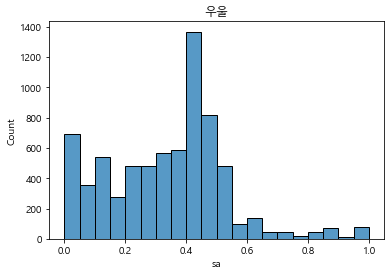

In [100]:
sns.histplot(d['sa'], bins=20).set_title('우울')

In [65]:
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')